In [1]:
import pymongo
from pymongo import MongoClient
import pandas as pd

In [2]:
client=MongoClient('')

In [3]:
from pandas.io.json import json_normalize
db = client.test
db_corr=client.corr
corr=db_corr.corr

In [11]:
datapoints = list(corr.find({}))
df=json_normalize(datapoints)
df

<ipython-input-11-703c46c13f12>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df=json_normalize(datapoints)


,_id,count_cinema,count_theatre,count_magasin_alimentaire,count_magasin_non_alimentaire,count_bus,count_bus_line,count_metro,count_espaces_verts,count_private_ecole,count_public_ecole,total_count_ecole,count_uni,db
0,75017,4.0,8,431,1209,349,28,28,136,26,60,86,1.0,56.5
1,75012,3.0,18,346,741,505,40,48,172,23,58,81,2.0,54.1
2,75002,3.0,11,77,780,76,13,18,25,6,9,15,2.0,42.3
3,75001,1.0,18,85,1176,159,27,30,14,2,7,9,1.0,49.6
4,75006,15.0,10,140,1253,224,26,18,31,25,15,40,10.0,50.4
5,75009,5.0,32,252,1131,221,23,46,41,13,29,42,NaN,43.5
6,75008,7.0,21,169,1534,392,36,52,27,19,14,33,3.0,49.3
7,75004,1.0,15,116,696,165,26,20,60,11,14,25,NaN,51.2
8,75015,4.0,10,460,1182,471,28,46,172,35,81,116,2.0,52.1
9,75018,2.0,34,613,1096,408,31,36,174,17,88,105,1.0,59.1


In [12]:
df = df.fillna(0)

In [13]:
paris_arr = pd.read_csv('C:/Users/Seohyun/Desktop/paris.csv')

In [14]:
paris_arr

,PostalCode,Price/m2,Latitude,Longitude
0,75001,13940,48.859,2.342
1,75002,12250,48.865,2.343
2,75003,12650,48.864,2.361
3,75004,13660,48.860,2.351
4,75005,12750,48.845,2.347
5,75006,14590,48.849,2.330
6,75007,14100,48.856,2.321
7,75008,11530,48.876,2.318
8,75009,11070,48.872,2.340
9,75010,10480,48.871,2.356


In [15]:
df= df.set_index('_id')
paris_arr=paris_arr.set_index('PostalCode')
dataset = pd.concat([df,paris_arr], axis=1)
dataset.head()

,count_cinema,count_theatre,count_magasin_alimentaire,count_magasin_non_alimentaire,count_bus,count_bus_line,count_metro,count_espaces_verts,count_private_ecole,count_public_ecole,total_count_ecole,count_uni,db,Price/m2,Latitude,Longitude
75001,1.0,18,85,1176,159,27,30,14,2,7,9,1.0,49.6,13940,48.859,2.342
75002,3.0,11,77,780,76,13,18,25,6,9,15,2.0,42.3,12250,48.865,2.343
75003,1.0,13,96,667,68,12,12,38,4,19,23,1.0,50.8,12650,48.864,2.361
75004,1.0,15,116,696,165,26,20,60,11,14,25,0.0,51.2,13660,48.860,2.351
75005,12.0,16,196,557,201,22,22,78,14,28,42,7.0,48.9,12750,48.845,2.347


In [16]:
del dataset['Latitude'] 
del dataset['Longitude'] 

In [17]:
dataset

,count_cinema,count_theatre,count_magasin_alimentaire,count_magasin_non_alimentaire,count_bus,count_bus_line,count_metro,count_espaces_verts,count_private_ecole,count_public_ecole,total_count_ecole,count_uni,db,Price/m2
75001,1.0,18,85,1176,159,27,30,14,2,7,9,1.0,49.6,13940
75002,3.0,11,77,780,76,13,18,25,6,9,15,2.0,42.3,12250
75003,1.0,13,96,667,68,12,12,38,4,19,23,1.0,50.8,12650
75004,1.0,15,116,696,165,26,20,60,11,14,25,0.0,51.2,13660
75005,12.0,16,196,557,201,22,22,78,14,28,42,7.0,48.9,12750
75006,15.0,10,140,1253,224,26,18,31,25,15,40,10.0,50.4,14590
75007,0.0,14,156,740,230,24,28,42,26,15,41,1.0,55.7,14100
75008,7.0,21,169,1534,392,36,52,27,19,14,33,3.0,49.3,11530
75009,5.0,32,252,1131,221,23,46,41,13,29,42,0.0,43.5,11070
75010,3.0,26,368,1025,269,28,30,62,15,37,52,0.0,46.8,10480


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[:]=scaler.fit_transform(dataset[:])

In [19]:
dataset

,count_cinema,count_theatre,count_magasin_alimentaire,count_magasin_non_alimentaire,count_bus,count_bus_line,count_metro,count_espaces_verts,count_private_ecole,count_public_ecole,total_count_ecole,count_uni,db,Price/m2
75001,0.066667,0.303030,0.014925,0.648330,0.208238,0.535714,0.450,0.000,0.00,0.000000,0.000,0.1,0.434524,0.882883
75002,0.200000,0.090909,0.000000,0.259332,0.018307,0.035714,0.150,0.055,0.08,0.022222,0.048,0.2,0.000000,0.578378
75003,0.066667,0.151515,0.035448,0.148330,0.000000,0.000000,0.000,0.120,0.04,0.133333,0.112,0.1,0.505952,0.650450
75004,0.066667,0.212121,0.072761,0.176817,0.221968,0.500000,0.200,0.230,0.18,0.077778,0.128,0.0,0.529762,0.832432
75005,0.800000,0.242424,0.222015,0.040275,0.304348,0.357143,0.250,0.320,0.24,0.233333,0.264,0.7,0.392857,0.668468
75006,1.000000,0.060606,0.117537,0.723969,0.356979,0.500000,0.150,0.085,0.46,0.088889,0.248,1.0,0.482143,1.000000
75007,0.000000,0.181818,0.147388,0.220039,0.370709,0.428571,0.400,0.140,0.48,0.088889,0.256,0.1,0.797619,0.911712
75008,0.466667,0.393939,0.171642,1.000000,0.741419,0.857143,1.000,0.065,0.34,0.077778,0.192,0.3,0.416667,0.448649
75009,0.333333,0.727273,0.326493,0.604126,0.350114,0.392857,0.850,0.135,0.22,0.244444,0.264,0.0,0.071429,0.365766
75010,0.200000,0.545455,0.542910,0.500000,0.459954,0.571429,0.450,0.240,0.26,0.333333,0.344,0.0,0.267857,0.259459


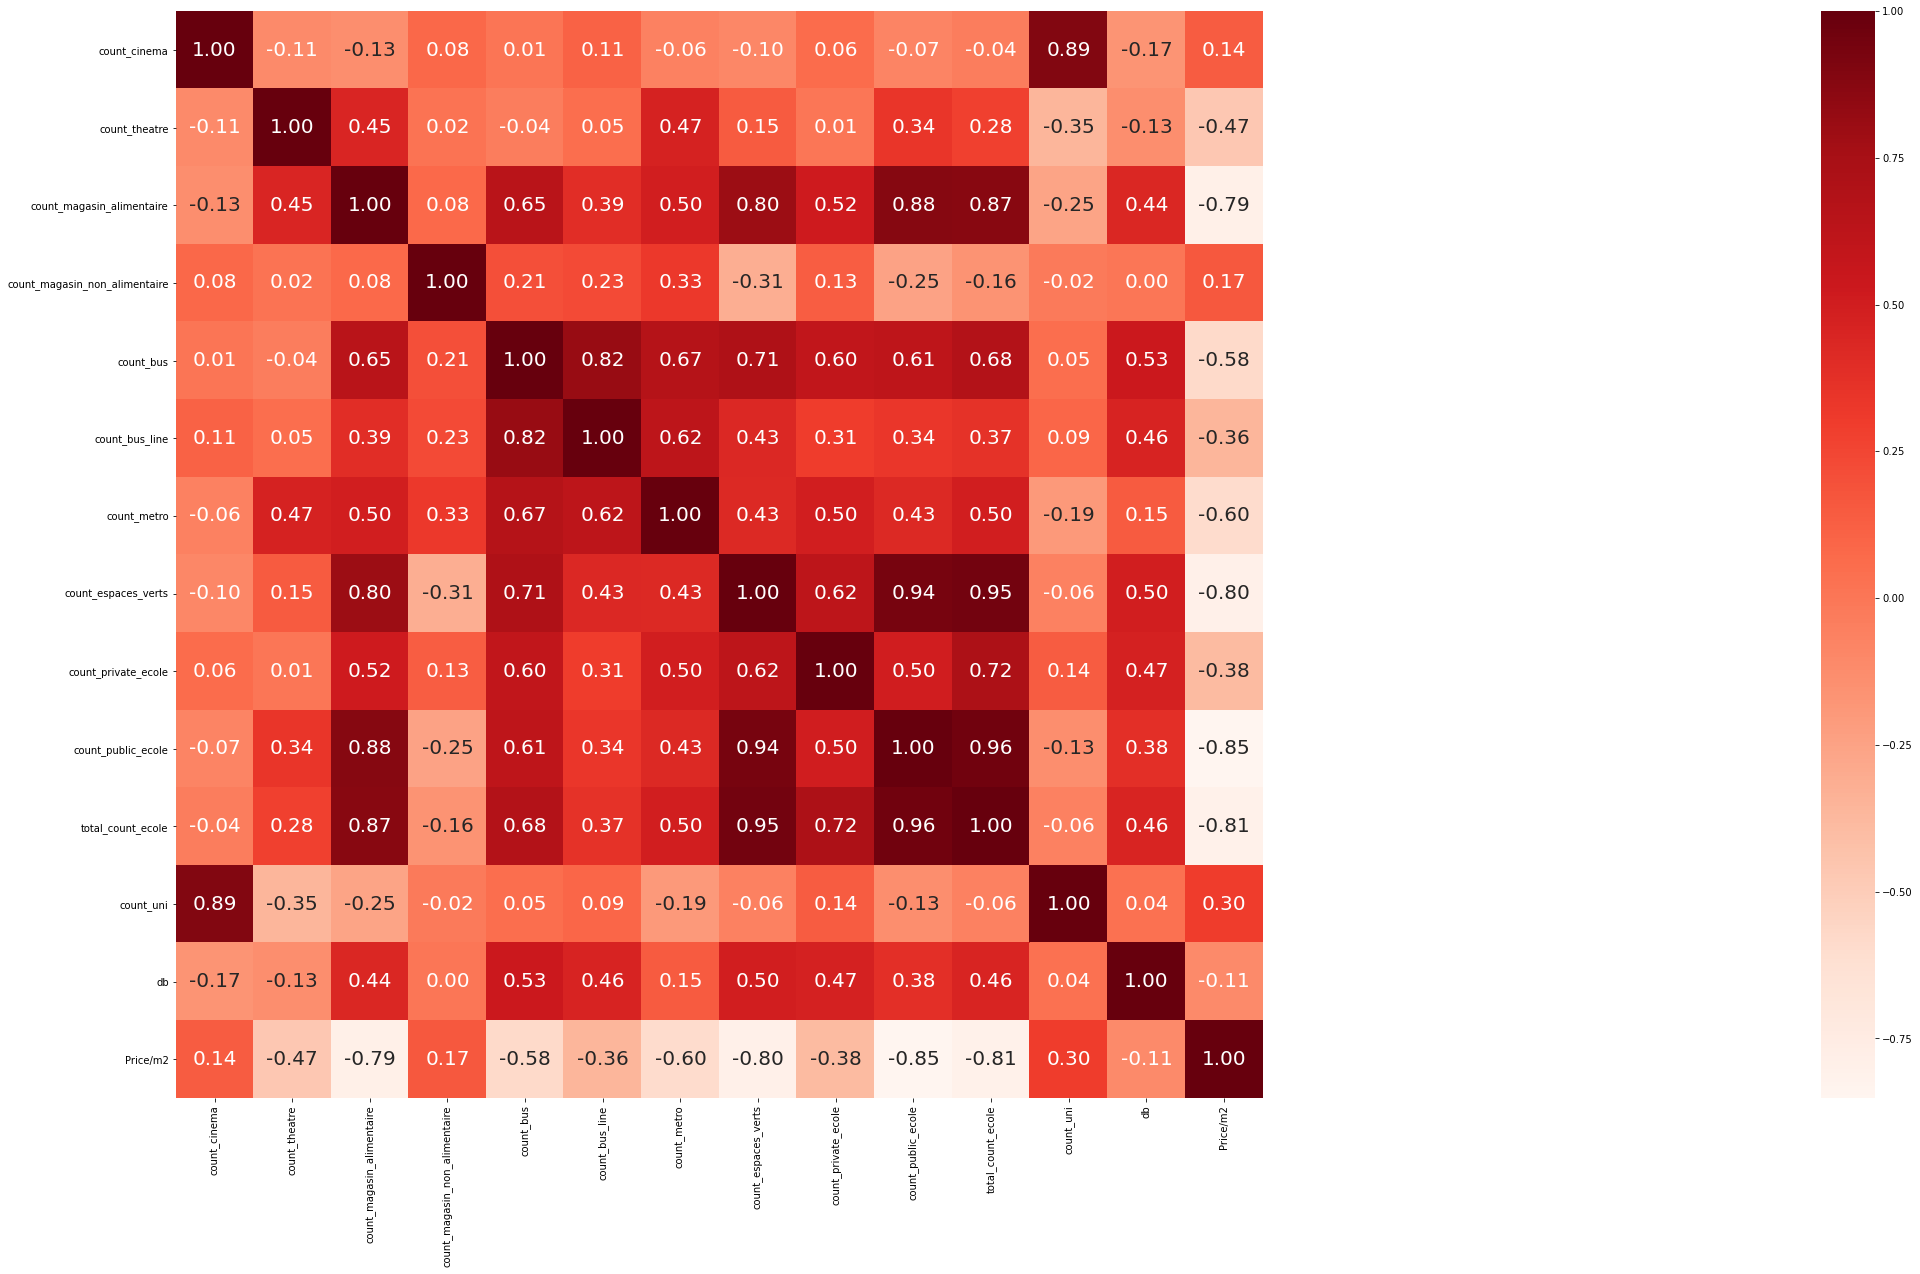

In [126]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize = (200,20))
heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Reds')